# Lecture 18

- Gray-scale images
- Adding Noise to an image: Salt & Pepper Noise and Gaussian Noise 

__Reading Material__: 
- [Matplotlib image tutorial](https://matplotlib.org/2.0.0/users/image_tutorial.html)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Given an array of size n × m × 3, imshow() interprets this as an image with RGB (red, green and blue) colors. The strength of each of the three colors is specified in the range [0,1]. For example, this is how we specify a 2 × 3 image, with colors red, green, blue, and purple, white, black:

[[[1 0 0]
  [0 1 0]
  [0 0 1]]

 [[1 0 1]
  [1 1 1]
  [0 0 0]]]
uint8


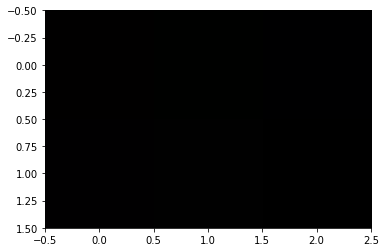

In [7]:
image=np.array([[[1.0,0.0,0.0],[0.0,1,0.0],[0.0,0.0,1.0]],
       [[1.0,0.0,1.0],[1.0,1.0,1.0],[0.0,0.0,0.0]]])
image = image.astype("uint8") 
print(image)
print(image.dtype)
plt.imshow(image) # 0 - 255 for int data type, 0 - 1 for float data type
plt.show()

## Gray-scale images

For this topic, we will assume that all images are gray-scale. This means that they have only one real number which signifies their color, rather than a vector of three numbers (RGB). For practical purposes we still store those images as having three channels, but they all have the same value. When transforming a color image to a gray-scale image, we can use the average value of the three channels, or a weighted average, such as the luminosity method, which uses the weighting 0.21R + 0.72G + 0.07B.

Our methods and code is easiest to understand when we treat images as 2D arrays that contain single real numbers (between 0 and 1) for each pixel, so most of the time, we first convert the 3D (n × m × 3) object into a 2D (n × m) object, and then back again at the end of the function. (No information is lost if we assume all three color channels are equal in every pixel.)


uint8
[ 86 126  37]
86
126


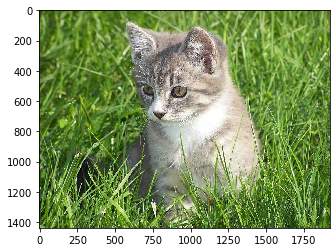

In [11]:
img=mpimg.imread('kitty-cat.jpg') 
print(img.dtype)
plt.imshow(img)
print(img[50,50])
print(img[50,50,0])
print(img[50,50,1])

float64


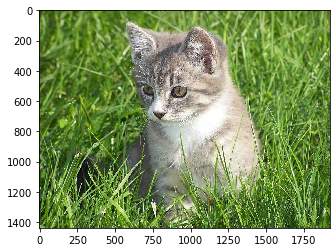

In [13]:
img=mpimg.imread('kitty-cat.jpg') 
img = img/255.0 #Convert to 64-bit floating point. [0,255] ->[0,1]
print(img.dtype)
plt.imshow(img)
plt.show()

In [14]:
print(img.shape)
print(img[50,50])
print(img.dtype)
print(img[:,:,0].shape) # red channel

(1439, 1920, 3)
[0.3372549  0.49411765 0.14509804]
float64
(1439, 1920)


[[0.  0.2 0.4 0.6 0.8]]


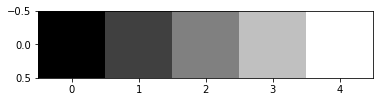

In [19]:
a = np.arange(0,1,0.2).reshape((1,5))
print(a)
#plt.imshow(a)
plt.imshow(a,cmap='gray')

[[0.         0.11111111 0.22222222 0.33333333 0.44444444]
 [0.55555556 0.66666667 0.77777778 0.88888889 1.        ]]
(2, 5)


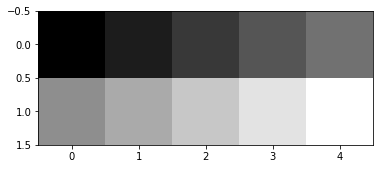

In [33]:
a = np.linspace(0,1,10).reshape((2,5))
print(a)
print(a.shape)
plt.imshow(a, cmap = "gray")

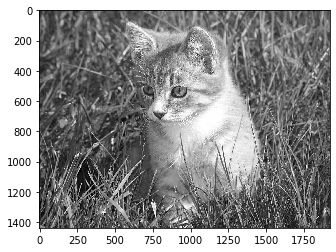

In [16]:
plt.imshow(img[:,:,0],cmap = 'gray')
plt.show()

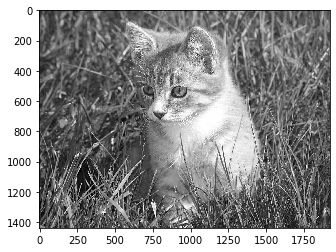

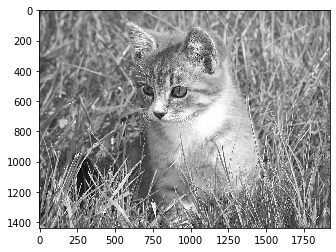

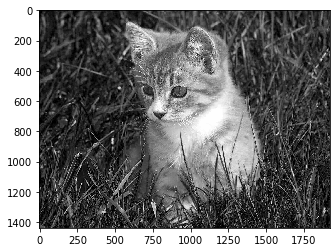

In [20]:
plt.imshow(img[:,:,0],cmap='gray') # R
plt.show()
plt.imshow(img[:,:,1],cmap='gray') # G
plt.show()
plt.imshow(img[:,:,2],cmap='gray') # B
plt.show()

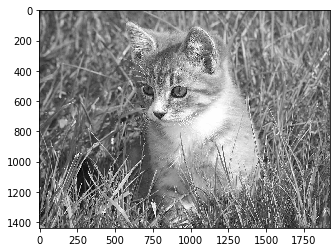

In [21]:
def average(pixel):
    return (pixel[0]*0.21 + pixel[1]*0.72 + pixel[2]*0.07)

greyImg = img.copy()
for rownum in range(img.shape[0]):
    for colnum in range(img.shape[1]):
        greyImg[rownum][colnum] = average(img[rownum][colnum])
plt.imshow(greyImg, cmap='gray')
plt.show()

In [23]:
#greyImg.shape
greyImg[50,50]

array([0.4367451, 0.4367451, 0.4367451])

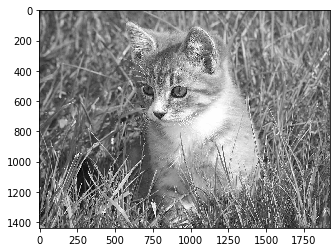

In [24]:
import numpy as np
# it is much faster when you vectorize the operations
greyImg = img[:,:,0]*0.21+img[:,:,1]*0.72+img[:,:,2]*0.07 #greyImg is now m x n
# Here we insert a new 3rd dimension, which we then repeat the array
greyImg = np.repeat(greyImg[:, :, np.newaxis], 3, axis=2)
#it has three identical slices [;,;,0/1/2]
plt.imshow(greyImg, cmap='gray')
plt.show()

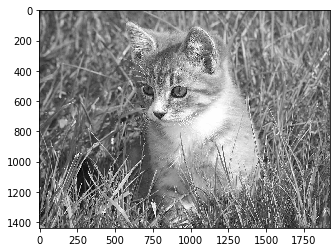

In [28]:
plt.imshow(greyImg)
#plt.imshow(greyImg[:,:,0], cmap='gray')

## Adding Noise to an image
Because we will write a denoising function, it is good to start with writing a function that adds noise to an image. This way, we can keep track of the “ground truth” of the image, and control the type and amount of noise that we add. We look at two different types of noise: salt & pepper noise, and Gaussian noise.


### Salt & Pepper Noise

Salt and pepper noise is a type of noise that replaces pixels with white or black pixels, independently of other pixels and independently of their original color. It is a type of noise that results from pieces of the signal being lost entirely, for example during transmission or conversion. We let our function replace each pixel by a white pixel with probability $p_s$, and by a black pixel with probability $p_p$, and keep its color with probability $1 − p_s − p_p$.

In [ ]:
def salt_pepper(im,ps=.1,pp=.1): #higher probability, higher noise
    im1=im[:,:,0].copy()
    n,m=im1.shape
    for i in range(n):
        for j in range(m):
            b=np.random.uniform()
            if b<ps:
                im1[i,j]=1 #white pixel
            elif b>1-pp:
                im1[i,j]=0 #black pixel
    noisy_im=[[[im1[i,j]]*3 for j in range(m)] for i in range(n)]
    #identical
    #noisy_im = np.repeat(im1[;,;,np.newaxis], 3, axis = 2)
    return noisy_im

In [ ]:
grey_salt_pepper=salt_pepper(greyImg)

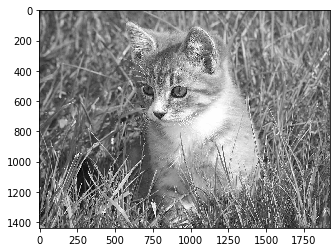

In [25]:
plt.imshow(greyImg)

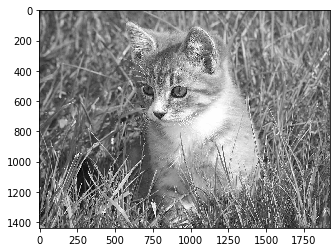

NameError: name 'grey_salt_pepper' is not defined

In [26]:
plt.imshow(greyImg, cmap='gray')
plt.show()
plt.imshow(grey_salt_pepper, cmap='gray')
plt.show() 

### Gaussian Noise
Gaussian noise is additive noise with a Gaussian distribution, usually introduced by the image sensor or during transmission. With Gaussian noise we have a small deviation around the original signal, rather than a complete loss of the signal.


In [ ]:
def gauss_noise(im,p=0.5):
    im1=im[:,:,0].copy()
    n,m=im1.shape
    noise=np.random.normal(0,np.var(im1)**(0.5)*p,[n,m]) 
    #mean = 0, std = var(im1)**(0.5)*p, noise.shape = [n,m]
    noisy_im1=im1+noise
    for i in range(n):
        for j in range(m):
            if noisy_im1[i,j]>1:
                noisy_im1[i,j]=1
            elif noisy_im1[i,j]<0:
                noisy_im1[i,j]=0
    noisy_im=[[[noisy_im1[i,j]]*3 for j in range(m)] for i in range(n)]
    return noisy_im

In [ ]:
grey_gauss=gauss_noise(greyImg)

In [ ]:
plt.imshow(greyImg, cmap='gray')
plt.show() 
plt.imshow(grey_gauss, cmap='gray')
plt.show() 

Note that we can generate the noise array in one line, and then simply add it to the image. This works for numpy arrays, and is one of the differences between numpy arrays and python lists. For example, see the difference between the following two commands:


In [ ]:
[1,2]+[3,4]

In [ ]:
np.array([1,2])+np.array([3,4])

Also, note the line `im1=im[:,:,0].copy()`. This ensures that when we alter the noisy image, we do not change the original input image. When we set two variables equal in python, they stay equal. For example:

In [1]:
a = [1,2]
b = a[:]
b[0] = 0
print(a)
print(b)

[1, 2]
[0, 2]


In [2]:
a = np.array([1,2])
b = a[:]
b += 3
print(a)
print(b)

NameError: name 'np' is not defined

In [ ]:
a = np.array([1,2])
b = a.copy()
b += 3
print(a)
print(b)

## Exercises
- Write a function that adds periodic noise, for example in horizontal bands.

- Write a function that adds noise only to dark areas of an image.
Read the wiki page https://en.wikipedia.org/wiki/Relative_luminance on how to determine the brightness of RGB colors.

In [ ]:
import scipy.misc
import matplotlib.pyplot as plt
fig1 = scipy.misc.ascent()
fig2 = scipy.misc.face(gray=True)
plt.imshow(fig2, cmap="gray")
plt.show()